<a href="https://colab.research.google.com/github/sachincs3108/Hands-on_project/blob/master/uber_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Deepali Handgar
## Roll No: 04
## Assignment : Clustering with PySpark
## Data Engineering
## M.Sc. Computer Science (With Specialization in Data Science), Sem - III
## University of Mumbai

In [ ]:
import pyspark
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
apr = spark.read.option('inferSchema',True).option('header',True).csv("/FileStore/tables/Apr.csv")
may = spark.read.option('inferSchema',True).option('header',True).csv("/FileStore/tables/May.csv")
jun = spark.read.option('inferSchema',True).option('header',True).csv("/FileStore/tables/Jun.csv")
jul = spark.read.option('inferSchema',True).option('header',True).csv("/FileStore/tables/Jul.csv")
aug = spark.read.option('inferSchema',True).option('header',True).csv("/FileStore/tables/Aug.csv")
sep = spark.read.option('inferSchema',True).option('header',True).csv("/FileStore/tables/Sep.csv")

In [ ]:
apr.show()

+----------------+-------+--------+------+
|       Date/Time|    Lat|     Lon|  Base|
+----------------+-------+--------+------+
|4/1/2014 0:11:00| 40.769|-73.9549|B02512|
|4/1/2014 0:17:00|40.7267|-74.0345|B02512|
|4/1/2014 0:21:00|40.7316|-73.9873|B02512|
|4/1/2014 0:28:00|40.7588|-73.9776|B02512|
|4/1/2014 0:33:00|40.7594|-73.9722|B02512|
|4/1/2014 0:33:00|40.7383|-74.0403|B02512|
|4/1/2014 0:39:00|40.7223|-73.9887|B02512|
|4/1/2014 0:45:00| 40.762| -73.979|B02512|
|4/1/2014 0:55:00|40.7524| -73.996|B02512|
|4/1/2014 1:01:00|40.7575|-73.9846|B02512|
|4/1/2014 1:19:00|40.7256|-73.9869|B02512|
|4/1/2014 1:48:00|40.7591|-73.9684|B02512|
|4/1/2014 1:49:00|40.7271|-73.9803|B02512|
|4/1/2014 2:11:00|40.6463|-73.7896|B02512|
|4/1/2014 2:25:00|40.7564|-73.9167|B02512|
|4/1/2014 2:31:00|40.7666|-73.9531|B02512|
|4/1/2014 2:43:00| 40.758|-73.9761|B02512|
|4/1/2014 3:22:00|40.7238|-73.9821|B02512|
|4/1/2014 3:35:00|40.7531|-74.0039|B02512|
|4/1/2014 3:35:00|40.7389|-74.0393|B02512|
+----------

In [ ]:
may.printSchema()

root
 |-- Date/Time: string (nullable = true)
 |-- Lat: double (nullable = true)
 |-- Lon: double (nullable = true)
 |-- Base: string (nullable = true)



In [ ]:
jun.printSchema()

root
 |-- Date/Time: string (nullable = true)
 |-- Lat: double (nullable = true)
 |-- Lon: double (nullable = true)
 |-- Base: string (nullable = true)



In [ ]:
jul.show()

+----------------+-------+--------+------+
|       Date/Time|    Lat|     Lon|  Base|
+----------------+-------+--------+------+
|7/1/2014 0:03:00|40.7586|-73.9706|B02512|
|7/1/2014 0:05:00|40.7605|-73.9994|B02512|
|7/1/2014 0:06:00| 40.732|-73.9999|B02512|
|7/1/2014 0:09:00|40.7635|-73.9793|B02512|
|7/1/2014 0:20:00|40.7204|-74.0047|B02512|
|7/1/2014 0:35:00|40.7487|-73.9869|B02512|
|7/1/2014 0:57:00|40.7444|-73.9961|B02512|
|7/1/2014 0:58:00|40.7132|-73.9492|B02512|
|7/1/2014 1:04:00| 40.759| -73.973|B02512|
|7/1/2014 1:08:00|40.7601|-73.9823|B02512|
|7/1/2014 1:12:00|40.6951|-74.1784|B02512|
|7/1/2014 1:23:00|40.7203|-73.9992|B02512|
|7/1/2014 1:45:00|40.7575|-73.9721|B02512|
|7/1/2014 2:07:00|40.7471|-73.9872|B02512|
|7/1/2014 2:48:00|40.7808|-73.9565|B02512|
|7/1/2014 3:11:00|40.7624|-73.9786|B02512|
|7/1/2014 3:14:00| 40.815|-73.9095|B02512|
|7/1/2014 3:20:00|40.7498|-73.9813|B02512|
|7/1/2014 3:28:00|40.7623|-73.9797|B02512|
|7/1/2014 3:38:00|40.7274|-73.9904|B02512|
+----------

In [ ]:
aug.show()

+----------------+-------+--------+------+
|       Date/Time|    Lat|     Lon|  Base|
+----------------+-------+--------+------+
|8/1/2014 0:03:00|40.7366|-73.9906|B02512|
|8/1/2014 0:09:00| 40.726|-73.9918|B02512|
|8/1/2014 0:12:00|40.7209|-74.0507|B02512|
|8/1/2014 0:12:00|40.7387|-73.9856|B02512|
|8/1/2014 0:12:00|40.7323|-74.0077|B02512|
|8/1/2014 0:13:00|40.7349|-74.0033|B02512|
|8/1/2014 0:15:00|40.7279|-73.9542|B02512|
|8/1/2014 0:17:00| 40.721|-73.9937|B02512|
|8/1/2014 0:19:00|40.7195| -74.006|B02512|
|8/1/2014 0:20:00|40.7448|-73.9799|B02512|
|8/1/2014 0:21:00|40.7399|-74.0057|B02512|
|8/1/2014 0:25:00|40.7651|-73.9683|B02512|
|8/1/2014 0:27:00|40.7354|-74.0081|B02512|
|8/1/2014 0:29:00|40.7339|-74.0028|B02512|
|8/1/2014 0:29:00|40.7364|-74.0301|B02512|
|8/1/2014 0:29:00|40.7364|-74.0301|B02512|
|8/1/2014 0:30:00|40.7252|-73.9516|B02512|
|8/1/2014 0:30:00|40.7433| -73.986|B02512|
|8/1/2014 0:34:00|40.7437|-73.9884|B02512|
|8/1/2014 0:36:00|40.7406|-74.0077|B02512|
+----------

In [ ]:
sep.show()

+----------------+-------+--------+------+
|       Date/Time|    Lat|     Lon|  Base|
+----------------+-------+--------+------+
|9/1/2014 0:01:00|40.2201|-74.0021|B02512|
|9/1/2014 0:01:00|  40.75|-74.0027|B02512|
|9/1/2014 0:03:00|40.7559|-73.9864|B02512|
|9/1/2014 0:06:00| 40.745|-73.9889|B02512|
|9/1/2014 0:11:00|40.8145|-73.9444|B02512|
|9/1/2014 0:12:00|40.6735|-73.9918|B02512|
|9/1/2014 0:15:00|40.7471|-73.6472|B02512|
|9/1/2014 0:16:00|40.6613|-74.2691|B02512|
|9/1/2014 0:32:00|40.3745|-73.9999|B02512|
|9/1/2014 0:33:00|40.7633|-73.9773|B02512|
|9/1/2014 0:33:00|40.7467|-73.6131|B02512|
|9/1/2014 0:37:00|40.8105|  -73.96|B02512|
|9/1/2014 0:38:00| 40.679|-74.0111|B02512|
|9/1/2014 0:39:00|40.4023|-73.9839|B02512|
|9/1/2014 0:48:00|40.7378|-74.0395|B02512|
|9/1/2014 0:48:00|40.7214|-73.9884|B02512|
|9/1/2014 0:49:00|40.8646|-73.9081|B02512|
|9/1/2014 1:08:00|40.7398|-74.0061|B02512|
|9/1/2014 1:17:00|40.6793|-74.0116|B02512|
|9/1/2014 1:19:00|40.7328|-73.9875|B02512|
+----------

In [ ]:
# Combining datasets
from pyspark.sql import DataFrame
from functools import reduce

def union_(*dfs):
    return reduce(DataFrame.unionAll,dfs)

In [ ]:
df = union_(apr,may,jun,jul,aug,sep)
df.show()

+----------------+-------+--------+------+
|       Date/Time|    Lat|     Lon|  Base|
+----------------+-------+--------+------+
|4/1/2014 0:11:00| 40.769|-73.9549|B02512|
|4/1/2014 0:17:00|40.7267|-74.0345|B02512|
|4/1/2014 0:21:00|40.7316|-73.9873|B02512|
|4/1/2014 0:28:00|40.7588|-73.9776|B02512|
|4/1/2014 0:33:00|40.7594|-73.9722|B02512|
|4/1/2014 0:33:00|40.7383|-74.0403|B02512|
|4/1/2014 0:39:00|40.7223|-73.9887|B02512|
|4/1/2014 0:45:00| 40.762| -73.979|B02512|
|4/1/2014 0:55:00|40.7524| -73.996|B02512|
|4/1/2014 1:01:00|40.7575|-73.9846|B02512|
|4/1/2014 1:19:00|40.7256|-73.9869|B02512|
|4/1/2014 1:48:00|40.7591|-73.9684|B02512|
|4/1/2014 1:49:00|40.7271|-73.9803|B02512|
|4/1/2014 2:11:00|40.6463|-73.7896|B02512|
|4/1/2014 2:25:00|40.7564|-73.9167|B02512|
|4/1/2014 2:31:00|40.7666|-73.9531|B02512|
|4/1/2014 2:43:00| 40.758|-73.9761|B02512|
|4/1/2014 3:22:00|40.7238|-73.9821|B02512|
|4/1/2014 3:35:00|40.7531|-74.0039|B02512|
|4/1/2014 3:35:00|40.7389|-74.0393|B02512|
+----------

In [ ]:
df.printSchema()

root
 |-- Date/Time: string (nullable = true)
 |-- Lat: double (nullable = true)
 |-- Lon: double (nullable = true)
 |-- Base: string (nullable = true)



In [ ]:
from pyspark.sql.functions import *
spark.sql('set spark.sql.legacy.timeParserPolicy = LEGACY')
uber1 = df.withColumn('date_new',to_date(col('Date/Time'),'MM/dd/yyyy HH:mm:ss'))
uber1.show()

+----------------+-------+--------+------+----------+
|       Date/Time|    Lat|     Lon|  Base|  date_new|
+----------------+-------+--------+------+----------+
|4/1/2014 0:11:00| 40.769|-73.9549|B02512|2014-04-01|
|4/1/2014 0:17:00|40.7267|-74.0345|B02512|2014-04-01|
|4/1/2014 0:21:00|40.7316|-73.9873|B02512|2014-04-01|
|4/1/2014 0:28:00|40.7588|-73.9776|B02512|2014-04-01|
|4/1/2014 0:33:00|40.7594|-73.9722|B02512|2014-04-01|
|4/1/2014 0:33:00|40.7383|-74.0403|B02512|2014-04-01|
|4/1/2014 0:39:00|40.7223|-73.9887|B02512|2014-04-01|
|4/1/2014 0:45:00| 40.762| -73.979|B02512|2014-04-01|
|4/1/2014 0:55:00|40.7524| -73.996|B02512|2014-04-01|
|4/1/2014 1:01:00|40.7575|-73.9846|B02512|2014-04-01|
|4/1/2014 1:19:00|40.7256|-73.9869|B02512|2014-04-01|
|4/1/2014 1:48:00|40.7591|-73.9684|B02512|2014-04-01|
|4/1/2014 1:49:00|40.7271|-73.9803|B02512|2014-04-01|
|4/1/2014 2:11:00|40.6463|-73.7896|B02512|2014-04-01|
|4/1/2014 2:25:00|40.7564|-73.9167|B02512|2014-04-01|
|4/1/2014 2:31:00|40.7666|-7

In [ ]:
from pyspark.sql.functions import month,dayofweek,year
uber2 = uber1.withColumn('year',year(col('date_new')))
uber2.show()

+----------------+-------+--------+------+----------+----+
|       Date/Time|    Lat|     Lon|  Base|  date_new|year|
+----------------+-------+--------+------+----------+----+
|4/1/2014 0:11:00| 40.769|-73.9549|B02512|2014-04-01|2014|
|4/1/2014 0:17:00|40.7267|-74.0345|B02512|2014-04-01|2014|
|4/1/2014 0:21:00|40.7316|-73.9873|B02512|2014-04-01|2014|
|4/1/2014 0:28:00|40.7588|-73.9776|B02512|2014-04-01|2014|
|4/1/2014 0:33:00|40.7594|-73.9722|B02512|2014-04-01|2014|
|4/1/2014 0:33:00|40.7383|-74.0403|B02512|2014-04-01|2014|
|4/1/2014 0:39:00|40.7223|-73.9887|B02512|2014-04-01|2014|
|4/1/2014 0:45:00| 40.762| -73.979|B02512|2014-04-01|2014|
|4/1/2014 0:55:00|40.7524| -73.996|B02512|2014-04-01|2014|
|4/1/2014 1:01:00|40.7575|-73.9846|B02512|2014-04-01|2014|
|4/1/2014 1:19:00|40.7256|-73.9869|B02512|2014-04-01|2014|
|4/1/2014 1:48:00|40.7591|-73.9684|B02512|2014-04-01|2014|
|4/1/2014 1:49:00|40.7271|-73.9803|B02512|2014-04-01|2014|
|4/1/2014 2:11:00|40.6463|-73.7896|B02512|2014-04-01|201

In [ ]:
uber2.printSchema()

root
 |-- Date/Time: string (nullable = true)
 |-- Lat: double (nullable = true)
 |-- Lon: double (nullable = true)
 |-- Base: string (nullable = true)
 |-- date_new: date (nullable = true)
 |-- year: integer (nullable = true)



In [ ]:
input_features = ['Lat','Lon']
va = VectorAssembler(inputCols = input_features, outputCol = 'features')
uber3 = va.transform(uber2)
uber3.show()

Exception ignored in: <function JavaWrapper.__del__ at 0x7faeac5e0e50>
Traceback (most recent call last):
  File "/databricks/spark/python/pyspark/ml/wrapper.py", line 39, in __del__
    if SparkContext._active_spark_context and self._java_obj is not None:
AttributeError: 'VectorAssembler' object has no attribute '_java_obj'
+----------------+-------+--------+------+----------+----+------------------+
|       Date/Time|    Lat|     Lon|  Base|  date_new|year|          features|
+----------------+-------+--------+------+----------+----+------------------+
|4/1/2014 0:11:00| 40.769|-73.9549|B02512|2014-04-01|2014| [40.769,-73.9549]|
|4/1/2014 0:17:00|40.7267|-74.0345|B02512|2014-04-01|2014|[40.7267,-74.0345]|
|4/1/2014 0:21:00|40.7316|-73.9873|B02512|2014-04-01|2014|[40.7316,-73.9873]|
|4/1/2014 0:28:00|40.7588|-73.9776|B02512|2014-04-01|2014|[40.7588,-73.9776]|
|4/1/2014 0:33:00|40.7594|-73.9722|B02512|2014-04-01|2014|[40.7594,-73.9722]|
|4/1/2014 0:33:00|40.7383|-74.0403|B02512|2014-04

In [ ]:
df = uber1.toPandas()
df.drop(['Base', 'Date/Time','date_new'], axis = 1, inplace = True)
df.head()

,Lat,Lon
0,40.7690,-73.9549
1,40.7267,-74.0345
2,40.7316,-73.9873
3,40.7588,-73.9776
4,40.7594,-73.9722


In [ ]:
# Clustering
from sklearn.cluster import KMeans
wcss = []
for k in range(1,11):
    kmod = KMeans(n_clusters = k, init = 'random').fit(df)
    wcss.append(kmod.inertia_)

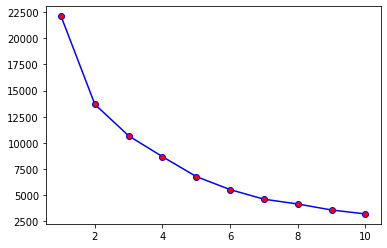

In [ ]:
plt.plot(range(1,11),wcss, marker = 'o',c = 'blue',markerfacecolor = 'red')
plt.show()

In [ ]:
# splitting the dataset
training, testing = uber3.randomSplit([0.75,0.25])
training.show()

+----------------+-------+--------+------+----------+----+------------------+
|       Date/Time|    Lat|     Lon|  Base|  date_new|year|          features|
+----------------+-------+--------+------+----------+----+------------------+
|4/1/2014 0:00:00|40.7188|-73.9863|B02598|2014-04-01|2014|[40.7188,-73.9863]|
|4/1/2014 0:00:00|40.7637|  -73.96|B02598|2014-04-01|2014|  [40.7637,-73.96]|
|4/1/2014 0:02:00|40.7444|-73.9964|B02598|2014-04-01|2014|[40.7444,-73.9964]|
|4/1/2014 0:02:00|40.7556|-73.9874|B02598|2014-04-01|2014|[40.7556,-73.9874]|
|4/1/2014 0:03:00|40.7741|-73.8722|B02598|2014-04-01|2014|[40.7741,-73.8722]|
|4/1/2014 0:05:00|40.7572|-73.9781|B02598|2014-04-01|2014|[40.7572,-73.9781]|
|4/1/2014 0:11:00| 40.769|-73.9549|B02512|2014-04-01|2014| [40.769,-73.9549]|
|4/1/2014 0:16:00|40.7748| -73.954|B02598|2014-04-01|2014| [40.7748,-73.954]|
|4/1/2014 0:17:00|40.7267|-74.0345|B02512|2014-04-01|2014|[40.7267,-74.0345]|
|4/1/2014 0:21:00|40.7092|-73.7974|B02598|2014-04-01|2014|[40.70

In [ ]:
# KMeans 
kmod = KMeans(k = 3, initMode = 'k-means||',featuresCol = 'features',predictionCol = 'prediction')
kmod = kmod.fit(training)

In [ ]:
# prediction 
p = kmod.transform(testing)
p.show()

+-----------------+-------+--------+------+----------+----+------------------+----------+
|        Date/Time|    Lat|     Lon|  Base|  date_new|year|          features|prediction|
+-----------------+-------+--------+------+----------+----+------------------+----------+
| 4/1/2014 0:11:00|40.7322|-73.9867|B02598|2014-04-01|2014|[40.7322,-73.9867]|         0|
| 4/1/2014 0:11:00|40.8134|-73.9453|B02598|2014-04-01|2014|[40.8134,-73.9453]|         0|
| 4/1/2014 0:25:00|40.7551| -73.984|B02598|2014-04-01|2014| [40.7551,-73.984]|         0|
| 4/1/2014 0:43:00|40.6679|-73.8732|B02598|2014-04-01|2014|[40.6679,-73.8732]|         1|
| 4/1/2014 0:46:00|40.6448|-73.7824|B02598|2014-04-01|2014|[40.6448,-73.7824]|         1|
| 4/1/2014 0:48:00|40.7263|-73.9917|B02598|2014-04-01|2014|[40.7263,-73.9917]|         0|
| 4/1/2014 0:49:00|40.7652|-73.9714|B02598|2014-04-01|2014|[40.7652,-73.9714]|         0|
| 4/1/2014 0:55:00| 40.753|-73.9929|B02598|2014-04-01|2014| [40.753,-73.9929]|         0|
| 4/1/2014

In [ ]:
p1 = p.toPandas()

/databricks/spark/python/pyspark/sql/pandas/conversion.py:92: UserWarning: toPandas attempted Arrow optimization because 'spark.sql.execution.arrow.pyspark.enabled' is set to true; however, failed by the reason below:
  Unable to convert the field features. If this column is not necessary, you may consider dropping it or converting to primitive type before the conversion.
Direct cause: Unsupported type in conversion to Arrow: VectorUDT
Attempting non-optimization as 'spark.sql.execution.arrow.pyspark.fallback.enabled' is set to true.
  warnings.warn(msg)


In [ ]:
p1['prediction'].value_counts()

Out[34]: 0    1053480
1      74724
2       5756
Name: prediction, dtype: int64

In [ ]:
p1.shape

Out[35]: (1133960, 8)

In [ ]:
p.createOrReplaceTempView('uber_df')

In [ ]:
df = spark.sql('select prediction, count(*) from uber_df group by prediction')
df.show()

+----------+--------+
|prediction|count(1)|
+----------+--------+
|         1|   74724|
|         2|    5756|
|         0| 1053480|
+----------+--------+



In [ ]:
# Evaluation
evaluator = ClusteringEvaluator()

silhouette = evaluator.evaluate(p)

print('Silhouette with squared Euclidean distance = ' + str(silhouette))

Silhouette with squared Euclidean distance = 0.8406885525380352
